In [73]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from google.colab import files                                                 
import os
import copy
import cv2 
import random 
from sklearn import model_selection
from sklearn import preprocessing
import numpy as np
import keras
from keras import layers
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [74]:
files.upload()                                                                 
! mkdir /root/.kaggle                                                           
! cp kaggle.json /root/.kaggle                                                  
! chmod 600 /root/.kaggle/kaggle.json                                      
# ! kaggle datasets list                         
! kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images                        
! unzip alzheimers-dataset-4-class-of-images.zip                                                      

Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
alzheimers-dataset-4-class-of-images.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  alzheimers-dataset-4-class-of-images.zip
replace Alzheimer_s Dataset/test/MildDemented/26 (19).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Alzheimer_s Dataset/test/MildDemented/26 (20).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [178]:
path = "Alzheimer_s Dataset/train"
img_size = 80
labels = []
data = []
X = []                                                                           
y = [] 
label_idx = -1

for folder in os.listdir(path):
  label_idx += 1
  labels.append(folder)
  sub_path = os.path.join(path,folder)
  for img in os.listdir(sub_path):
    img_path = os.path.join(sub_path,img)
    img_1 = cv2.imread(img_path)
    img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
    img_array = cv2.resize(img_1,(img_size,img_size))
    data.append([img_array , label_idx])
    

random.shuffle(data)

for tmp_x, tmp_y in data:                                                   
    X.append(tmp_x)
    y.append(tmp_y) 

X = np.array(X)
y = np.array(y)

print(f"labels: {labels}")
print(f"data: {len(data)}")
print("")
print(f"y[:10] :{y[:10]}")

labels: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
data: 5121

y[:10] :[3 3 2 2 0 0 2 2 2 2]


In [179]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=0, stratify = y)    #wycięcie zbioru danych uczących i testowych (20% danych testowych) wraz z etykietami
print("X_train.shape: " + str(X_train.shape) + "   X_train.dtype: " + str(X_train.dtype))
print("X_test.shape:  " + str(X_test.shape)  + "   X_test.dtype:  " + str(X_test.dtype))
print("y_train.shape: " + str(y_train.shape) + "" + str(y_train[:20]))
print("y_test.shape:  " + str(y_test.shape) + "" + str(y_test[:20]))

counter = {}
for o in y_train:
  if o not in counter:
    counter[o] = 1
  else:
    counter[o] += 1

print("counter:  " + str(counter))

X_train.shape: (4096, 80, 80)   X_train.dtype: uint8
X_test.shape:  (1025, 80, 80)   X_test.dtype:  uint8
y_train.shape: (4096,)[2 2 2 2 2 2 0 2 2 2 2 2 3 2 2 3 3 0 3 3]
y_test.shape:  (1025,)[3 3 3 2 2 2 2 3 2 2 2 3 0 2 2 2 3 2 3 0]
counter:  {2: 2048, 0: 573, 3: 1433, 1: 42}


# Model referencyjny

In [186]:
ref_model = models.Sequential()
# ref_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
ref_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
ref_model.add(layers.MaxPooling2D((2, 2)))
ref_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
ref_model.add(layers.Flatten())
ref_model.add(layers.Dense(64, activation='relu'))
ref_model.add(layers.Dense(64, activation='relu'))
ref_model.add(layers.Dense(4))

ref_model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 78, 78, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 flatten_12 (Flatten)        (None, 87616)             0         
                                                                 
 dense_33 (Dense)            (None, 64)                5607488   
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                     

In [ ]:
from IPython.display import Image
import tensorflow.keras.utils

tensorflow.keras.utils.plot_model(ref_model, to_file='ref_model.png', show_shapes=True,show_layer_names=True)
Image(filename='ref_model.png') 

In [187]:
ref_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']) 
ref_history = ref_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

test_loss, test_acc = ref_model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

Epoch 1/5
128/128 [==============================] - 39s 300ms/step - loss: 1.0062 - accuracy: 0.5120 - val_loss: 0.8958 - val_accuracy: 0.5659
Epoch 2/5
128/128 [==============================] - 39s 301ms/step - loss: 0.8036 - accuracy: 0.6311 - val_loss: 0.6159 - val_accuracy: 0.7707
Epoch 3/5
128/128 [==============================] - 39s 308ms/step - loss: 0.4940 - accuracy: 0.7903 - val_loss: 0.3763 - val_accuracy: 0.8410
Epoch 4/5
128/128 [==============================] - 39s 303ms/step - loss: 0.2524 - accuracy: 0.9143 - val_loss: 0.1686 - val_accuracy: 0.9434
Epoch 5/5
128/128 [==============================] - 39s 302ms/step - loss: 0.0781 - accuracy: 0.9758 - val_loss: 0.1000 - val_accuracy: 0.9668
33/33 - 2s - loss: 0.1000 - accuracy: 0.9668 - 2s/epoch - 65ms/step
0.966829240322113


33/33 - 2s - loss: 0.1000 - accuracy: 0.9668 - 2s/epoch - 66ms/step


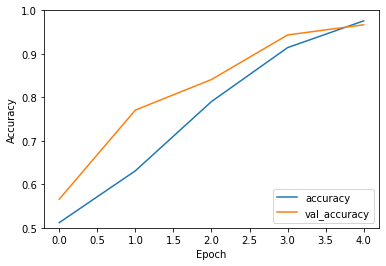

In [188]:
plt.plot(ref_history.history['accuracy'], label='accuracy')
plt.plot(ref_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = ref_model.evaluate(X_test,  y_test, verbose=2)

# Badanie wpływu normalizacji danych

In [185]:
print(np.amax(X_train[0]))
X_train = X_train / 255.  
X_test = X_test / 255.
print(np.amax(X_train[0]))

246
0.9647058823529412


In [97]:
print(np.amax(X_train[0]))

0.9764705882352941


# Progowanie

In [173]:
print(np.amax(X[0]))
# print(X[0])

255


In [ ]:
import cv2
from matplotlib import pyplot as plt
  


w = 10*2
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = X[i] 
    histr = cv2.calcHist([img],[0],None,[256],[0,256])
    # plt.plot(histr)
    # plt.show()
    fig.set_size_inches(40, 10, forward=True)
    fig.add_subplot(rows, columns, i)
    plt.plot(histr)
plt.show()

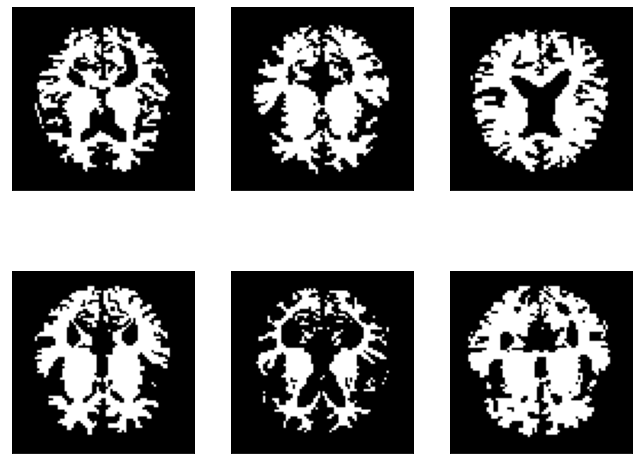

In [165]:
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interactive 
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
thresh = 130

for i in range(6):
  ret,thresh1 = cv2.threshold(X[i],thresh,255,cv2.THRESH_BINARY)
  plt.subplot(2,3,i+1),plt.imshow(thresh1,'gray',vmin=0,vmax=255)
  plt.xticks([]),plt.yticks([])

In [168]:
for i in range(len(X)):
  ret,thresh1 = cv2.threshold(X[i],thresh,255,cv2.THRESH_BINARY)
  X[i] = thresh1


# New Section

In [22]:
# X_train = tf.convert_to_tensor(X_train)     # konwersja explicite nie wplywa na predkosc uczenia sie sieci
# X_test = tf.convert_to_tensor(X_test)
# y_train = tf.convert_to_tensor(y_train)
# y_test = tf.convert_to_tensor(y_test)

In [32]:
print(np.amax(X_train[0]))
X_train = X_train / 255.  
print(np.amax(X_train[0]))

193
0.7568627450980392


In [67]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(img_size, img_size),
  layers.Rescaling(1./255)
])
random_flip = tf.keras.Sequential([
  layers.RandomFlip("vertical"),
])
random_rotation = tf.keras.Sequential([
  layers.RandomRotation(0.05),
])
random_zoom = tf.keras.Sequential([
  layers.RandomZoom(0.05, 0.05)
])




SyntaxError: ignored

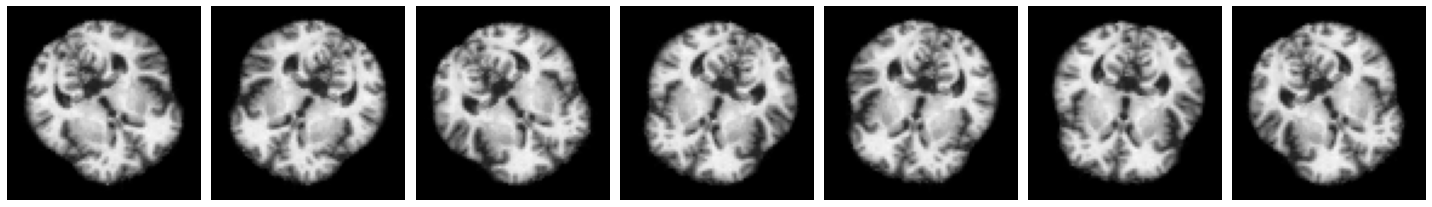

In [72]:
show_numbbb = 7

def plotImages(images_arr): 
  fig, axes = plt.subplots(1, show_numbbb, figsize=(20,20)) 
  axes = axes.flatten() 
  for img, ax in zip( images_arr, axes): 
    ax.imshow(img) 
    ax.axis('off') 
  plt.tight_layout() 
  plt.show() 

#

gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range= 50, 
    width_shift_range= 0.0, 
    height_shift_range= 0.0, 
    shear_range= 0.0, 
    zoom_range= 0.0, 
    channel_shift_range= 0, 
    horizontal_flip=True 
) 

ddd = np.expand_dims(X_train[0], 0)        

aug_iter = gen.flow(ddd)

ang_images = [next(aug_iter)[0].astype(np.uint8) for i in range(show_numbbb)] 

plotImages(ang_images)

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [40]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/10
128/128 [==============================] - 40s 311ms/step - loss: 1.1245 - accuracy: 0.5144 - val_loss: 72.9187 - val_accuracy: 0.5659
Epoch 2/10
128/128 [==============================] - 39s 308ms/step - loss: 0.7970 - accuracy: 0.6287 - val_loss: 45.5653 - val_accuracy: 0.7190
Epoch 3/10
128/128 [==============================] - 38s 300ms/step - loss: 0.4832 - accuracy: 0.8025 - val_loss: 45.8852 - val_accuracy: 0.8302
Epoch 4/10
128/128 [==============================] - 41s 323ms/step - loss: 0.2536 - accuracy: 0.9065 - val_loss: 31.4586 - val_accuracy: 0.8898
Epoch 5/10
128/128 [==============================] - 39s 309ms/step - loss: 0.0903 - accuracy: 0.9771 - val_loss: 39.9654 - val_accuracy: 0.8859
Epoch 6/10
128/128 [==============================] - 40s 313ms/step - loss: 0.0485 - accuracy: 0.9868 - val_loss: 13.1141 - val_accuracy: 0.9610
Epoch 7/10
128/128 [==============================] - 39s 307ms/step - loss: 0.0163 - accuracy: 0.9973 - val_loss: 12.2164 -

33/33 - 2s - loss: 12.1928 - accuracy: 0.9737 - 2s/epoch - 70ms/step


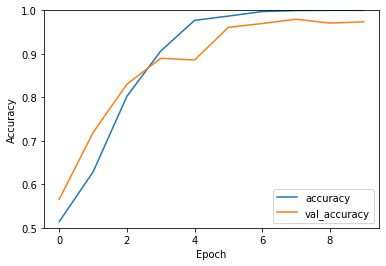

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [29]:
print(test_acc)

0.9424390196800232
